# Supplementary Figure 10: Comparisons between treatment condition DEG sets

In Supplementary Figure 10, we generate dot plots that show the intersection between each of our gene sets within cell type and time point. To aid in identifying coordinated vs. opposing interactions, we treat up- and down-regulated gene sets separately.

These dot plots show the fraction of overlap between each gene set (size of dots), the statistical significance of the overlap based on hypergeometric tests (color intensity), and help guide identification of coordinated (red = up and blue = down) and opposing (green) intersections.

Intersections between gene sets and enrichment statistics were previously calculated in a notebook in `02-mast-deg-testing/`.

## Setup

To assist with the multiple color ramps used in these plots, we'll install the `colorway` package from Github.

In [1]:
devtools::install_github("hypercompetent/colorway", upgrade = "never")

Skipping install of 'colorway' from a github remote, the SHA1 (8ba8f002) has not changed since last install.
  Use `force = TRUE` to force installation



## Load packages

hise: The Human Immune System Explorer R SDK package  
purrr: Functional programming tools  
dplyr: Dataframe handling functions  
ggplot2: plotting functions  
cowplot: multi-panel plot assembly
colorway: functions for color selection and conversion

In [2]:
quiet_library <- function(...) { suppressPackageStartupMessages(library(...)) }
quiet_library(hise)
quiet_library(purrr)
quiet_library(dplyr)
quiet_library(ggplot2)
quiet_library(cowplot)
quiet_library(colorway)

In [3]:
out_dir <- "output/supp_figure_10"
if(!dir.exists(out_dir)) { dir.create(out_dir, recursive = TRUE) }

## Retrieve files

Now, we'll use the HISE SDK package to retrieve the analysis results for gene set intersections.

In [4]:
ol_uuid <- list("080b27e3-0487-4971-8733-3a3adc9b3d3d")

In [5]:
ol_fres <- cacheFiles(ol_uuid)
ol_file <- list.files(
    paste0("cache/",ol_uuid),
    recursive = TRUE, full.names = TRUE
)

submitting request as query ID first...

retrieving files using fileIDS...



In [6]:
type_colors <- read.csv("../common/color_sets/aifi_cell_type_colors.csv")
type_colors <- type_colors %>%
  filter(aifi_cell_type != "t_cd8_mait") %>%
  mutate(cell_type_label = factor(cell_type_label, levels = cell_type_label))

In [7]:
cond_pos <- read.csv("../common/color_sets/condition_positions.csv")

In [8]:
head(cond_pos)

,cond,direction,pos
,<chr>,<chr>,<dbl>
1,bortezomib_04,dn,1.0
2,bortezomib_04,up,2.0
3,bortezomib_24,dn,3.5
4,bortezomib_24,up,4.5
5,bortezomib_72,dn,6.0
6,bortezomib_72,up,7.0


In [9]:
x_cond_pos <- cond_pos %>%
  rename(group1_cond = cond,
         group1_direction = direction,
         group1_pos = pos)
y_cond_pos <- cond_pos %>%
  rename(group2_cond = cond,
         group2_direction = direction,
         group2_pos = pos)

## Build dot plots

In [10]:
all_ol <- read.csv(ol_file)

In [11]:
all_ol <- all_ol %>%
  mutate(group1_cond = ifelse(
    group1_timepoint == 4,
    paste0(group1_treatment, "_04"),
    paste0(group1_treatment, "_", group1_timepoint)
  )) %>%
  mutate(group2_cond = ifelse(
    group2_timepoint == 4,
    paste0(group2_treatment, "_04"),
    paste0(group2_treatment, "_", group2_timepoint)
  ))

In [12]:
plot_ol <- all_ol %>%
  left_join(type_colors) %>%
  left_join(x_cond_pos) %>%
  left_join(y_cond_pos)

Joining with `by = join_by(aifi_cell_type)`
Joining with `by = join_by(group1_direction, group1_cond)`
Joining with `by = join_by(group2_direction, group2_cond)`


In [13]:
head(plot_ol)

,aifi_cell_type,group1_treatment,group1_timepoint,group1_direction,group2_treatment,group2_timepoint,group2_direction,n_common,n_group1,n_group2,⋯,adjP,ol_genes,group1_cond,group2_cond,cell_type_label,cell_type_color,cell_type_xpos,cell_type_ypos,group1_pos,group2_pos
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,⋯,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>,<int>,<int>,<dbl>,<dbl>
1,t_cd4_cm,bortezomib,4,up,bortezomib,24,up,7661,500,500,⋯,0.5544284,ACAP2;API5;ATF6;ATG14;BICD1;CDYL2;COP1;CSNK1A1;DAP3;EPC2;FASTKD2;FERMT3;FSD1L;GCLM;GLRX3;HIPK2;MAN2B1;MAP4K3;MYSM1;POC5;PSMA3;PSMD6;PSME4;RREB1;SETD2;SLC41A2;SNX9;SS18;TBC1D19;THUMPD3-AS1;TMCO3;TRIM44;TRIP4;UBE2E2;ZSWIM6,bortezomib_04,bortezomib_24,CD4 CM,#00AEEF,2,6,2,4.5
2,t_cd4_cm,bortezomib,4,up,bortezomib,24,dn,7661,500,500,⋯,0.6362721,AC107223.1;AP1S2;BTLA;CARS2;CD2;CEACAM1;CRKL;CTSC;DPP4;DYRK2;HAPLN3;HRH2;ID2;IKZF3;IL2RA;LINC02595;MAML2;MBNL1;MTCH1;PNP;PSIP1;RPS6KA3;SOCS2;SOCS2-AS1;TGFBR1;TGFBR2;TMEM134;TNIK;TRBC2;TRIM14;TXNIP;UBA3;VAMP4;ZHX3,bortezomib_04,bortezomib_24,CD4 CM,#00AEEF,2,6,2,3.5
3,t_cd4_cm,bortezomib,4,dn,bortezomib,24,dn,7661,500,500,⋯,0.7903102,AC008105.3;AC114760.2;ACAP1;AL589693.1;ALOX5AP;B2M;BTG1;CFAP97;GLCCI1;GNG2;HMGB1;ITGB1;LBH;MCL1;MYL12A;NLRC3;NMT2;PAG1;PLCL2;PPP1R16B;RBL2;SAMD3;SAMHD1;SDCCAG8;SMCHD1;STMN3;SYNE1;TMSB4X;TMTC2;TRAF3IP3;UFL1-AS1;XYLT1,bortezomib_04,bortezomib_24,CD4 CM,#00AEEF,2,6,1,3.5
4,t_cd4_cm,bortezomib,4,dn,bortezomib,24,up,7661,500,500,⋯,0.7903102,BICDL1;BRD2;CCNK;CCSER2;CLTC;CREBZF;FXR1;GAB2;GLYR1;IFI44;KIAA0232;LIN54;MAFG;MAST4;NSFL1C;NSMAF;OLA1;PIKFYVE;PKM;RAB3GAP1;RFFL;SEL1L3;SGPP2;SOD1;TFDP2;TMEM208;TMEM245;TUBA1C;UFD1;WNK1;XRCC6;XRN1,bortezomib_04,bortezomib_24,CD4 CM,#00AEEF,2,6,1,4.5
5,t_cd4_cm,bortezomib,4,up,bortezomib,72,up,7738,500,500,⋯,0.3681036,ACAP2;AKT3;API5;ATF6;ATG2B;BICD1;CD55;CDYL2;CEP112;DAP3;EXOC4;GCLM;GLRX3;GRIK1;HIPK2;HP1BP3;KPNA1;MAN2B1;MAP1LC3B;MICU1;NFE2L1;PATJ;PNRC1;POC5;PSMD6;PSME4;PTOV1;RUFY3;SBF2;SLC41A2;SNX9;STRN;TBC1D19;ZBTB20;ZHX2;ZNF44;ZSWIM6,bortezomib_04,bortezomib_72,CD4 CM,#00AEEF,2,6,2,7.0
6,t_cd4_cm,bortezomib,4,up,bortezomib,72,dn,7738,500,500,⋯,0.8434172,BTLA;CD2;CD2AP;CEACAM1;CEP83;CTSC;DPP4;EIF2AK2;FNDC3B;GRAP2;HAPLN3;IKZF3;LY75;MBNL1;MDFIC;MDN1;MSI2;MYB;MYC;PPARGC1B;RAC2;RPS12;SAMD4A;SLC37A3;SOCS2;SOCS2-AS1;TNIK;TRBC2;TRIM14;TXNIP;VAV1,bortezomib_04,bortezomib_72,CD4 CM,#00AEEF,2,6,2,6.0


In [14]:
plot_df <- plot_ol %>%
  mutate(nlpadj = -log10(adjP)) %>%
  mutate(nlpadj = ifelse(nlpadj > 50, 50, nlpadj)) %>%
  mutate(fill = case_when(
      group1_cond == group2_cond & group1_direction == group2_direction ~ "black",
      group1_direction != group2_direction ~ values_to_colors(nlpadj, 2, 50, colorset = c("white","limegreen","darkgreen")),
      group1_direction == "up" & group2_direction == "up" ~ values_to_colors(nlpadj, 2, 50, colorset = c("white","orangered","red")),
      group1_direction == "dn" & group2_direction == "dn" ~ values_to_colors(nlpadj, 2, 50, colorset = c("white","dodgerblue","blue"))
      )
  )

In [15]:
sep_pos <- data.frame(
    p = c(8,16)
)

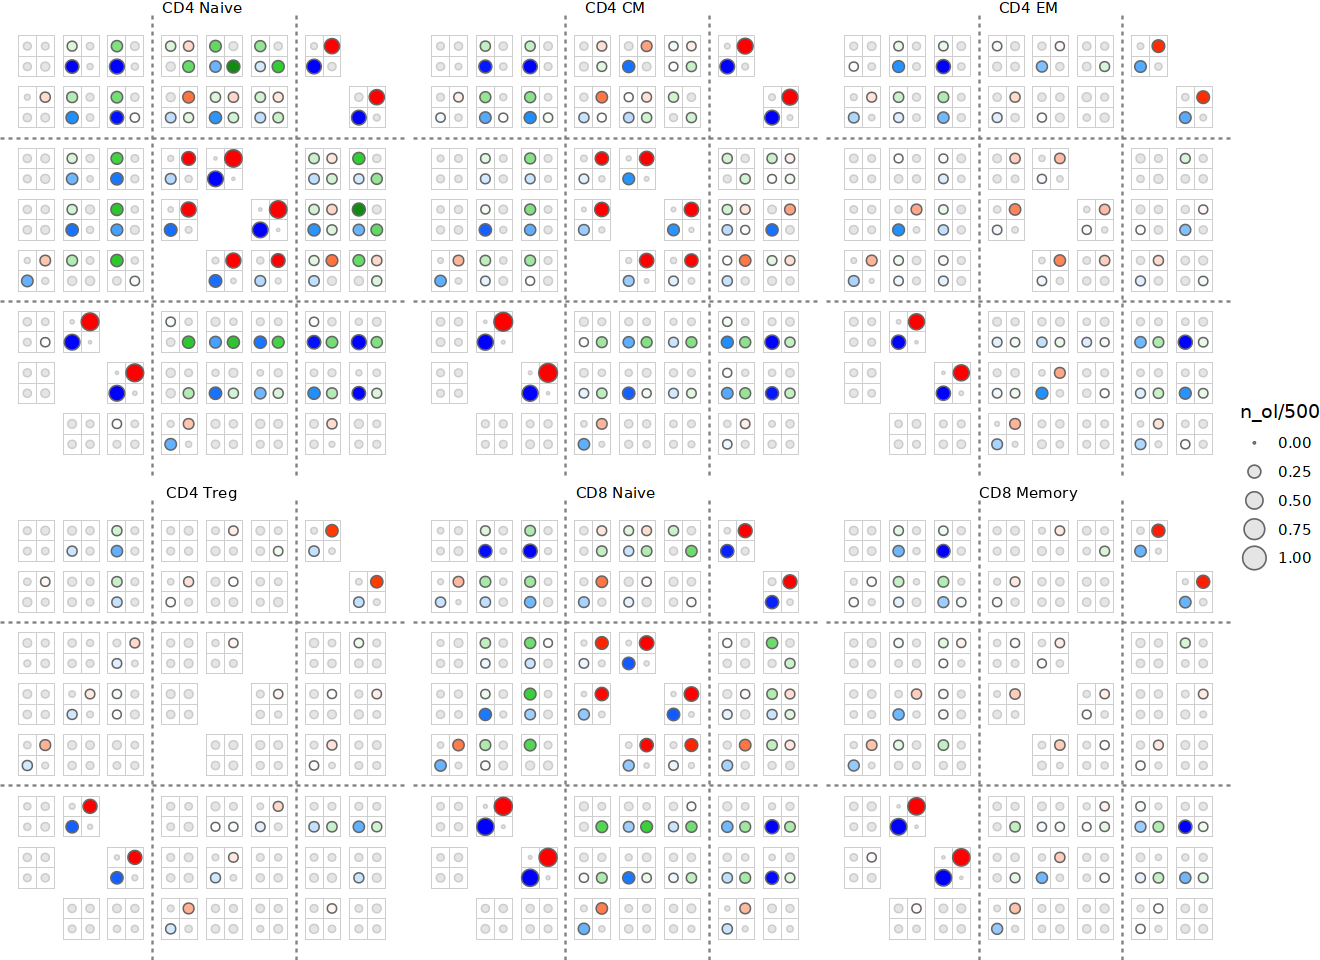

In [16]:
options(repr.plot.width = 11, repr.plot.height = 8)
point_grid <- ggplot() +
  geom_hline(
      data = sep_pos,
      aes(yintercept = p),
      linetype = "dashed",
      linewidth = 0.5,
      color = "gray50"
  ) +
  geom_vline(
      data = sep_pos,
      aes(xintercept = p),
      linetype = "dashed",
      linewidth = 0.5,
      color = "gray50"
  ) +
  geom_tile(
      data = plot_df,
      aes(
          x = group1_pos,
          y = group2_pos
      ),
      fill = "white",
      color = "gray60"
  ) +
  geom_point(
      data = plot_df %>%
        filter(nlpadj <= 2),
      aes(
          x = group1_pos,
          y = group2_pos,
          size = n_ol / 500
      ),
      fill = "gray90",
      color = "gray80",
      pch = 21
  ) +
  geom_point(
      data = plot_df %>%
        filter(nlpadj > 2),
      aes(
          x = group1_pos,
          y = group2_pos,
          fill = fill,
          size = n_ol / 500
      ),
      color = "gray40",
      pch = 21
  ) +
  scale_color_identity() +
  scale_fill_identity() +
  scale_size_area(limits = c(0,1)) +
  facet_wrap(
      ~ cell_type_label,
      ncol = 3
  ) +
  theme_void()
point_grid

In [17]:
out_plot <- file.path(out_dir, paste0("deg_ol_dotplots_", Sys.Date(), ".pdf"))

ggsave(
    out_plot,
    point_grid,
    width = 11, height = 8
)

## Build multiple color legends

Since we're working with multiple color ramps, we need to generate matching legend plots as ggplot2 doesn't support multiple gradients (to my knowledge).

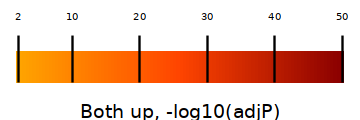

In [18]:
options(repr.plot.width = 3, repr.plot.height = 1)
r_df <- data.frame(x = seq(2, 50, length.out = 100)) %>%
  mutate(fill = values_to_colors(x, 2, 50, colorset = c("orange", "orangered", "darkred")))

r <- ggplot() +
  geom_tile(
      data = r_df,
      aes(x = x, y = 0, 
          fill = fill)
  ) +
  geom_segment(
      data = data.frame(x = c(2, seq(10,50,10))),
      aes(x = x, xend = x,
          y = -0.5, yend = 1)
  ) +
  geom_text(
      data = data.frame(x = c(2, seq(10,50,10))),
      aes(x = x, y = 1.5, label = x),
      size = 2,
      vjust = 0
  ) +
  scale_fill_identity() +
  scale_x_continuous(
      "Both up, -log10(adjP)"
  ) +
  scale_y_continuous(
      "",
      limits = c(-1, 2)
  ) +
  theme_void() +
  theme(axis.title.x = element_text())
r

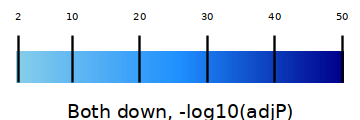

In [19]:
options(repr.plot.width = 3, repr.plot.height = 1)
b_df <- data.frame(x = seq(2, 50, length.out = 100)) %>%
  mutate(fill = values_to_colors(x, 2, 50, colorset = c("skyblue", "dodgerblue", "darkblue")))

b <- ggplot() +
  geom_tile(
      data = b_df,
      aes(x = x, y = 0, 
          fill = fill)
  ) +
  geom_segment(
      data = data.frame(x = c(2, seq(10,50,10))),
      aes(x = x, xend = x,
          y = -0.5, yend = 1)
  ) +
  geom_text(
      data = data.frame(x = c(2, seq(10,50,10))),
      aes(x = x, y = 1.5, label = x),
      size = 2,
      vjust = 0
  ) +
  scale_fill_identity() +
  scale_x_continuous(
      "Both down, -log10(adjP)"
  ) +
  scale_y_continuous(
      "",
      limits = c(-1, 2)
  ) +
  theme_void() +
  theme(axis.title.x = element_text())
b

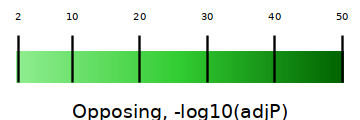

In [20]:
options(repr.plot.width = 3, repr.plot.height = 1)
g_df <- data.frame(x = seq(2, 50, length.out = 100)) %>%
  mutate(fill = values_to_colors(x, 2, 50, colorset = c("lightgreen","limegreen", "darkgreen")))

g <- ggplot() +
  geom_tile(
      data = g_df,
      aes(x = x, y = 0, 
          fill = fill)
  ) +
  geom_segment(
      data = data.frame(x = c(2, seq(10,50,10))),
      aes(x = x, xend = x,
          y = -0.5, yend = 1)
  ) +
  geom_text(
      data = data.frame(x = c(2, seq(10,50,10))),
      aes(x = x, y = 1.5, label = x),
      size = 2,
      vjust = 0
  ) +
  scale_fill_identity() +
  scale_x_continuous(
      "Opposing, -log10(adjP)"
  ) +
  scale_y_continuous(
      "",
      limits = c(-1, 2)
  ) +
  theme_void() +
  theme(axis.title.x = element_text())
g

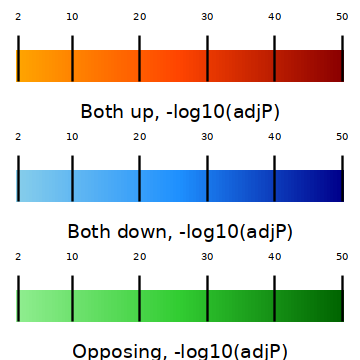

In [21]:
options(repr.plot.width = 3, repr.plot.height = 3)
l_grid <- plot_grid(
    r, b, g,
    ncol = 1
)
l_grid

In [22]:
out_legend <- file.path(out_dir, paste0("deg_ol_dotplots_legend_", Sys.Date(), ".pdf"))

ggsave(
    out_legend,
    l_grid,
    width = 3, height = 3
)

# Store results in HISE

Finally, we store the output file in our Collaboration Space for later retrieval and use. We need to provide the UUID for our Collaboration Space (aka `studySpaceId`), as well as a title for this step in our analysis process.

The hise function `uploadFiles()` also requires the FileIDs from the original fileset for reference.

In [23]:
study_space_uuid <- "40df6403-29f0-4b45-ab7d-f46d420c422e"
title <- paste("VRd TEA-seq Supp Figure 10", Sys.Date())

In [24]:
out_list <- as.list(c(out_plot, out_legend))

In [25]:
out_list

[[1]]
[1] "output/supp_figure_10/deg_ol_dotplots_2023-10-28.pdf"

[[2]]
[1] "output/supp_figure_10/deg_ol_dotplots_legend_2023-10-28.pdf"

In [26]:
uploadFiles(
    files = out_list,
    studySpaceId = study_space_uuid,
    title = title,
    inputFileIds = ol_uuid,
    store = "project",
    doPrompt = FALSE
)

[1] "Cannot determine the current notebook."
[1] "1) /home/jupyter/repro-vrd-tea-seq/figures/Supp-Fig-10_treatment_comparisons.ipynb"
[1] "2) /home/jupyter/repro-vrd-tea-seq/02-mast-deg-testing/02-R_deg_result_overlaps.ipynb"
[1] "3) /home/jupyter/repro-vrd-tea-seq/figures/Figure-R_all_type_overlaps (1).ipynb"


Please select (1-3)  1


$files
$files[[1]]
[1] "output/supp_figure_10/deg_ol_dotplots_2023-10-28.pdf"

$files[[2]]
[1] "output/supp_figure_10/deg_ol_dotplots_legend_2023-10-28.pdf"


$traceId
[1] "eebde80a-67d8-44f7-aaac-f4efeea1ca15"

In [27]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] colorway_0.2.0 cowplot_1.1.1  ggplot2_3.4.3  dplyr_1.1.3    purrr_1.0.2   
[6] hise_2.16.0   

loaded via a namespace (and not attached):
 [1] gtable_0.3.4      htmlwidgets_1.6.2 devtools_2.4.5    remotes_2.4.2.1  
 [5] processx_3.8.2    callr_3.7.3       Cairo_1.6-1       vctrs_0.6.3      
 [9] tools_4.3.1 